# Week 8 - Complex numbers in Numpy - Root finding methods

This week, we start with a short section on how Python handles **complex numbers**. Then, we introduce our first root finding algorithms as ways to solve nonlinear equations: the **bisection method** and **fixed-point iteration**.

The best way to learn programming is to write code. Don't hesitate to edit the code in the example cells, or add your own code, to test your understanding. You will find practice exercises throughout the notebook, denoted by 🚩 **Exercise $x$:**.

In [1]:
from show_solutions import show, initialise_path
show = initialise_path(show, '../solutions/w08_solutions.md')

---
### 📚 Book sections

- **ASC**: sections 5.1, **5.2**
- **PCP**: sections 7.1.3, 7.4

---

## 1. Complex numbers

Python natively supports complex numbers via the `complex` object. To create a complex number, we can type it directly in **cartesian** form, using the letter **`j`** for the imaginary unit $i$ such that $i^2 = -1$. Its real and imaginary parts can then be retrieved using the `.real` and `.imag` attributes.

In [2]:
# Create a complex number
z = 3.1 - 4j
print(z)
print(type(z))

# Print its real and imaginary parts (both floats)
print(z.real)
print(z.imag)

print(type(z.real))

(3.1-4j)
<class 'complex'>
3.1
-4.0
<class 'float'>


Note that when the imaginary part is $\pm 1$, you should type `1j` instead of just `j` -- otherwise Python looks for a variable named `j`:

In [3]:
print(1j)
print(j)

1j


NameError: name 'j' is not defined

Another way to build complex number objects is to use the `complex()` function:

In [ ]:
# Create the same complex number as before
w = complex(3.1, -4)
print(w)
print(w == z)

(3.1-4j)
True


Python's [`cmath` module](https://docs.python.org/3.8/library/cmath.html) offers functions to handle complex numbers. Note that Numpy also supports `complex` types, and most Numpy functions work as expected on complex numbers.

In [ ]:
import cmath
import numpy as np

# Switch between cartesian and polar coordinates
z_cart = 0.0 + 3.0j
r, phi = cmath.polar(z_cart)

print(f'Cartesian: x = {z_cart.real}, y = {z_cart.imag}')
print(f'Polar: r = {r}, phi = {phi}')

print(z_cart)
print(r * cmath.exp(1j * phi))
print(r * np.exp(1j * phi))

Cartesian: x = 0.0, y = 3.0
Polar: r = 3.0, phi = 1.5707963267948966
3j
(1.8369701987210297e-16+3j)
(1.8369701987210297e-16+3j)


In [ ]:
# Numpy arrays of complex numbers
Z1 = np.random.random(5) + 1j * np.random.random(5)
print(Z1)

Z2 = np.array([1, 2j, -3+1j])
print(Z2)
print(type(Z2))
print(type(Z2[0]))

Z3 = np.array([1, 2, 3, 4], dtype=complex)
print(Z3)

[0.12591577+0.36318812j 0.29707236+0.99017152j 0.88009783+0.542193j
 0.83826571+0.81365517j 0.5445246 +0.94837077j]
[ 1.+0.j  0.+2.j -3.+1.j]
<class 'numpy.ndarray'>
<class 'numpy.complex128'>
[1.+0.j 2.+0.j 3.+0.j 4.+0.j]


In [ ]:
# Numpy math functions
z = 5.2 - 4.8j

print(np.cos(z))
print(np.abs(z))    # complex magnitude
print(np.round(z))
print(z**2)

w = 10j
print(np.cos(w) == np.cosh(w.imag))
print(z * w)

(28.466756058944867-53.67083673354006j)
7.076722405181654
(5-5j)
(4.0000000000000036-49.92j)
False
(48+52j)


In [ ]:
# Behaviour of np.sqrt()
a = -4.
b = -4. + 0j

print(f'The type of {a} is {type(a)}, the type of {b} is {type(b)}.')

print(np.sqrt(a))    # returns np.nan with a warning
print(np.sqrt(b))    # works fine!

The type of -4.0 is <class 'float'>, the type of (-4+0j) is <class 'complex'>.
nan
2j


/var/folders/lt/1rnk3rn54ds_kmkv_yqmxsz40000gn/T/ipykernel_18210/1578105718.py:7: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(a))    # returns np.nan with a warning


---
**📚 Learn more:**

- [Python's `complex` number type](https://docs.python.org/3.8/library/stdtypes.html#typesnumeric) - Python documentation
- [`cmath` - Mathematical functions for complex numbers](https://docs.python.org/3.8/library/cmath.html) - Python documentation
- [`np.real()`](https://numpy.org/doc/stable/reference/generated/numpy.real.html#numpy.real), [`np.imag()`](https://numpy.org/doc/stable/reference/generated/numpy.imag.html#numpy.imag), [`np.angle()`](https://numpy.org/doc/stable/reference/generated/numpy.angle.html#numpy.angle) - Numpy documentation

---

🚩 **Exercise 1**

Write a function `quad_roots()` which takes 3 arguments `a`, `b`, `c`, all floating point numbers (with $a \neq 0$), and returns the two roots `x1`, `x2` of the polynomial $p(x) = ax^2 + bx + c$, as floating point numbers if the roots are real, or as Python complex numbers if the roots are complex.

In [4]:
import numpy as np

def quad_roots(a: float = 1.0, b: float = 0.0, c: float = 0.0) -> tuple[float, float]:
    """Takes 3 floats which correspond to the coef of p(x) and returns the roots, real and complex."""
    return np.roots([c, b, a])

# Some quick testing...
print(quad_roots(1, 0, 1))     # roots of x^2 + 1 are -i, i
print(quad_roots(1, 0, -1))    # roots of x^2 - 1 are -1, 1
print(quad_roots(1, -2, 1))    # roots of x^2 - 2x + 1 are 1, 1
print(quad_roots(1, -2, 2))    # roots of x^2 - 2x + 2 are (1-i), (1+i)

[-0.+1.j  0.-1.j]
[ 1. -1.]
[1.00000001 0.99999999]
[0.5+0.5j 0.5-0.5j]


In [ ]:
show('Exercise 1')

Accordion(children=(Output(layout=Layout(border_bottom='1px solid green', border_left='1px solid green', borde…

---
## 2. Solving nonlinear equations with root-finding algorithms

In this section, we consider equations of the form

$$
F(x) = 0,
$$

where $F(x)$ is a **nonlinear** function of $x$. Solving this equation is equivalent to finding the *root(s)* $x_\ast$ of the function $F$.

There are direct methods we can use to solve *linear* equations, even linear systems of equations as we saw in Week 4; however, a nonlinear equation of the form given above doesn't always have a solution which can be found analytically.

The methods we will discuss to solve nonlinear equations are all **iterative**:
1. we start with a guess for where the root may be;
2. if we are close enough to the solution, for instance if the function is sufficiently close to zero for the current guess, we stop;
3. if not, we refine our guess using information we have about the function;
4. we go back to step 1 with our new guess.

Step 3 is what differentiates the methods we will use, as they each use a different process to refine the current best guess. For all these methods, the key idea is to reduce the nonlinear problem to smaller, simpler problems, which we solve repeatedly (iteratively).

---
### 2.1. The bisection method

Given a continuous function $F \left( x \right)$, if $F \left( a \right) \le 0$ and $F \left( b \right) \ge 0$, the Intermediate Value Theorem tells us that there must be a root in the closed interval $\left[ a, b \right].$ The bisection method proceeds by testing the **sign** of $F \left( c \right)$ where $c$ is the **mid-point** of the interval $\left[ a, b \right]$, and uses this to halve the size of the interval in which a root is sought. The process is repeated with the new half-interval, until the interval is small enough to approximate the root with a given tolerance.

The next few exercises will guide you through implementing the bisection method yourself.

---
**📚 Learn more:**
- **ASC**: section 5.2
- **PCP**: section 7.4

---
🚩 **Exercise 2**

Consider the function

$$
F \left( x \right) = \sin \left( 2 \pi x \right) e^{4 x} + x.
$$

Plot this function in the interval $x \in \left[ 0, 1 \right]$ and identify the three roots in this interval. Check that $F \left( 0.2 \right)$ and $F \left( 0.6 \right)$ have opposite signs.

You may find it convenient to create a function `F`.

True


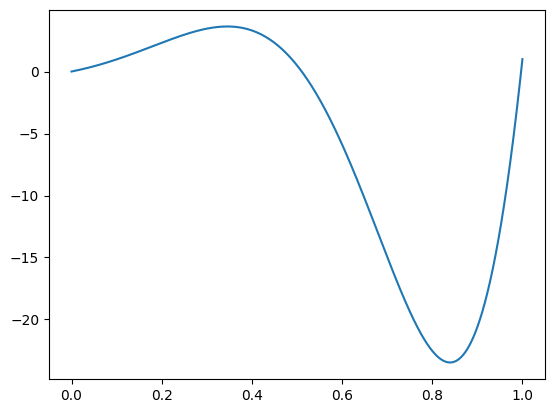

In [30]:
import matplotlib.pyplot as plt

x_values: np.ndarray = np.linspace(0, 1, 1000)

def F(x):
    return np.sin(np.pi * 2 * x) * np.exp(4 * x) + x

y_values: np.ndarray = F(x_values)
roots = [(x_values[i+1] + x_values[i])/2 for i in range(len(x_values)-1) if F(x_values[i])*F(x_values[i+1]) <= 0]

fig, ax = plt.subplots()
ax.plot(x_values, y_values)
ax.plot()

#Cool way to check if two items have the same sign
print(F(0.2) * F(0.6) < 0)


In [ ]:
show('Exercise 2')

---
🚩 **Exercise 3**

Define variables corresponding to $a = 0.2$ and $b = 0.6$. Define $c$ to be the midpoint $c = (a + b) / 2$.

Then, start a loop, which should iterate until the root is found. At each iteration:
- Depending on the sign of $F \left( a \right) F \left( c \right)$, decide whether to set $a$ or $b$ to be equal to $c$, so that there is a root of $F \left( x \right)$ in the *new* interval $\left[ a, b \right]$ (with half the width of the previous interval).
- Define $c$ to be the new midpoint $c = (a + b) / 2$.
- The loop should stop when you have found the root $x_\ast$ within an error of $10^{-10}$.

A possible convergence criterion is $|F(c)| < \varepsilon$, where $\varepsilon$ is the tolerance -- here, $10^{-10}$.

How many iterations are needed to find the root to within this error?

In [51]:
a, b = 0.2, 0.6
c =  (a + b) / 2
tolerance = 1e-10

i = 0

while abs(F(c)) > tolerance:
    # If the midpoint and starting point are different signs, we want to move closer to a by making b the midpoint
    if F(a) * F(c) < 0:
        b = c
    # Otherwise, we want to shift towards b by making a the midpoint
    else:
        a = c

    # Create new midpoint
    c = (a + b) / 2

    # Calculate number of iterations needed
    i += 1

print(f'Root: x = {c} \nNumber of iterations needed: {i}')
    

Root: x = 0.5105501871788873 
Number of iterations needed: 33


In [ ]:
show('Exercise 3')

---
🚩 **Exercise 4**

Choose different $a$ and $b$ values in order to find the root near $x = 1$, to within an error of $10^{-10}$.

You may wish to write your code from Exercise 3 into a function `bisection(F, a, b, tol)`, which finds the root of a function `F` in the interval `[a, b]` to within an error of `tol`, and returns the value of the roots and the number of iterations.

In [54]:
a, b = 0.8, 1.0
tolerance = 1e-10

def bisection(F, a, b, tol) -> tuple[float, int]:
    """Finds the root of a function within interval [a,b] within a given error of tol, along with number of iterations it took."""
    i = 0
    c =  (a + b) / 2
    while abs(F(c)) > tol:
        # If the midpoint and starting point are different signs, we want to move closer to a by making b the midpoint
        if F(a) * F(c) < 0:
            b = c
        # Otherwise, we want to shift towards b by making a the midpoint
        else:
            a = c

        # Create new midpoint
        c = (a + b) / 2

        # Calculate number of iterations needed
        i += 1
    
    return c, i

c, i = bisection(F, a, b, tolerance)
print(f'Root: x = {c} \nNumber of iterations needed: {i}')


Root: x = 0.9970589877390013 
Number of iterations needed: 37


In [ ]:
show('Exercise 4')

---
### 2.2. Regula falsi

The "regula falsi" method is similar to the bisection method, with an important difference: instead of selecting the midpoint of the interval $[a, b]$ at each iteration, we trace a straight line between the points $(a, F(a))$ and $(b, F(b))$, and select the point $c$ where this line intersects the x-axis. In other words, we interpolate $F$ linearly between $a$ and $b$, and we find the root of this interpolating polynomial (of degree 1) at each iteration.

---
🚩 **Exercise 5**

Show that $c$ is given by

$$
c = \frac{a F(b) - b F(a)}{F(b) - F(a)}.
$$

*Hint: a line with slope $\alpha$ which passes through the point $(x_0, y_0)$ has equation*

$$
y - y_0 = \alpha (x - x_0).
$$

In [ ]:
show('Exercise 5')

y - F(a) = slope(c - a)

plug in slope = F(b) - F(a) / b - a

y = 0 and x = c bc that is the solution we are looking for, not the midpoint

---
🚩 **Exercise 6**

Consider the same function $F$ as in section 2.1.

Define variables corresponding to $a = 0.2$ and $b = 0.6$.

Then, proceed as you did for the bisection method, but instead of defining $c$ to be the midpoint of $[a, b]$, define $c$ as above.

How many iterations are needed to find the root to within a tolerance of $10^{-10}$?

You may wish to define a function `regula_falsi(F, a, b, tol)` to find a root of a function `F` within an interval `[a, b]` to within an error `tol`, which returns the computed root and the number of iterations.

In [72]:
a, b = 0.2, 0.6
tolerance = 1e-10

def regula_falsi(F, a, b, tol) -> tuple[float, int, np.ndarray]:
    """Finds the root of a function within interval [a,b] within a given error of tol, along with number of iterations it took."""
    i = 0
    guesses: np.ndarray = np.zeros(0)
    c = (a * F(b) - b * F(a)) / (F(b) - F(a))
    while abs(F(c)) > tol:
        # If the midpoint and starting point are different signs, we want to move closer to a by making b the value of c
        if F(a) * F(c) < 0:
            b = c
        # Otherwise, we want to shift towards b by making a the value of c
        else:
            a = c

        # Store old c in np.array
        guesses = np.append(guesses, c)

        # Create new c
        c = (a * F(b) - b * F(a)) / (F(b) - F(a))

        # Calculate number of iterations needed
        i += 1
    
    # Append final correct ish guess
    guesses = np.append(guesses, c)

    return c, i, guesses

c, i, x = regula_falsi(F, a, b, tolerance)
print(f'Root: x = {c} \nNumber of iterations needed: {i}')

Root: x = 0.5105501871775513 
Number of iterations needed: 19


In [ ]:
show('Exercise 6')

---
## 3. Convergence of root-finding methods

The bisection and regula falsi methods are guaranteed to converge to a root, provided $F$ is sufficiently smooth and the starting interval $[a, b]$ is chosen appropriately.

But different methods may converge to a root at different *speeds*. The **order of convergence** for root-finding algorithms is defined in terms of successive values of the error $e_k := x_k - x_\ast$ between the true solution $x_\ast$ and the guess $x_k$ obtained at the $k$th iteration.

---
### 🚩 Definition: Order of convergence of root-finding methods

A convergent root-finding algorithm converges **at $p$th order** if

$$
\lim_{k \to \infty} \frac{|e_{k+1}|}{|e_k|^p} = \alpha,
$$

where $\alpha \in \mathbb{R}$ is a constant.

---

For a $p$th order convergent method, we expect the error at the $k+1$th iteration to be roughly proportional to the $p$th power of the error at the $k$th iteration, for sufficiently large $k$ -- that is, when we are in a close enough neighbourhood of $x_\ast$.

Note that $p$ is not always an integer.

---
🚩 **Exercise 7**

Modify your code from Exercise 6 so that all the successive guesses $x_k$ are stored in a Numpy array. Perform the task from Exercise 6 again -- use the regula falsi method to find the same root of `F`, using the same starting interval and tolerance. You should obtain the same result, but now you should also have a vector `x` with length $k_\max + 1$ containing all the guesses.

Consider $x_{k_\max}$, the last guess obtained by the method, to be the "true solution". Compute the magnitude of the error $e_k$ between each of the previous guesses $x_k$ and the true solution.

For $p=1, 1.5, 2, 2.5$, compute the ratio $\frac{|e_{k+1}|}{|e_k|^p}$ for $k=0, 1, \dots, k_\max - 1$, and plot it against $k$. Set your y-axis limits to $[0, 1000]$ to start with, and reduce the range as necessary.

Given the definition above, what do you expect is the order of convergence of regula falsi? How do you explain the appearance of the graph?

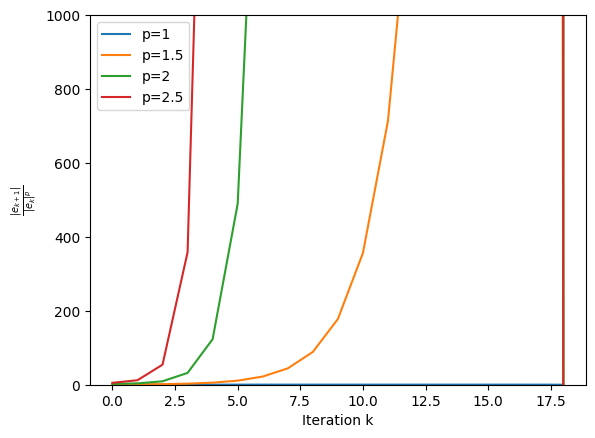

In [101]:
error = np.abs(x[-1] - x[:])
p_values = [1, 1.5, 2, 2.5]
ratio: np.ndarray = []
for p in p_values:
    y_vals = np.abs(error[1:])/np.abs(error[:-1])**p
    ratio.append(y_vals)

fig, ax = plt.subplots()
for idx, p in enumerate(p_values):
    ax.plot(range(i), ratio[idx], label=f'p={p}')

ax.set_ylim([0, 1000])  # Adjust as necessary based on the data
ax.set_xlabel('Iteration k')
ax.set_ylabel(r'$\frac{|e_{k+1}|}{|e_k|^p}$')
ax.legend()
plt.show()

In [ ]:
show('Exercise 7')